# Titanic - Machine Learning from Disaster

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
3,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [ ]:
df.shape


(891, 12)

In [ ]:
df = df.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis= 1)


In [ ]:
df.dtypes
df.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Fare,248
Embarked,3


In [ ]:
# replacing the missing values
df['Age'] =  df['Age'].replace(np.nan,df['Age'].median(axis=0))
df['Embarked'] = df['Embarked'].replace(np.nan, 'S')

#making age integer
df['Age'] = df['Age'].astype(int)
#replacing with 1 and female with 0 for easier processing
df['Sex'] = df['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [ ]:
# creating age groups - young (0-18), adult(18-30), middle aged(30-50), old (50-100)
df['Age'] = pd.cut(x=df['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = ['Infant', 'Teen', '20s', '30s', '40s', '50s', 'Elder'])


# Exploratory Data Analysis

<Axes: xlabel='Parch', ylabel='count'>

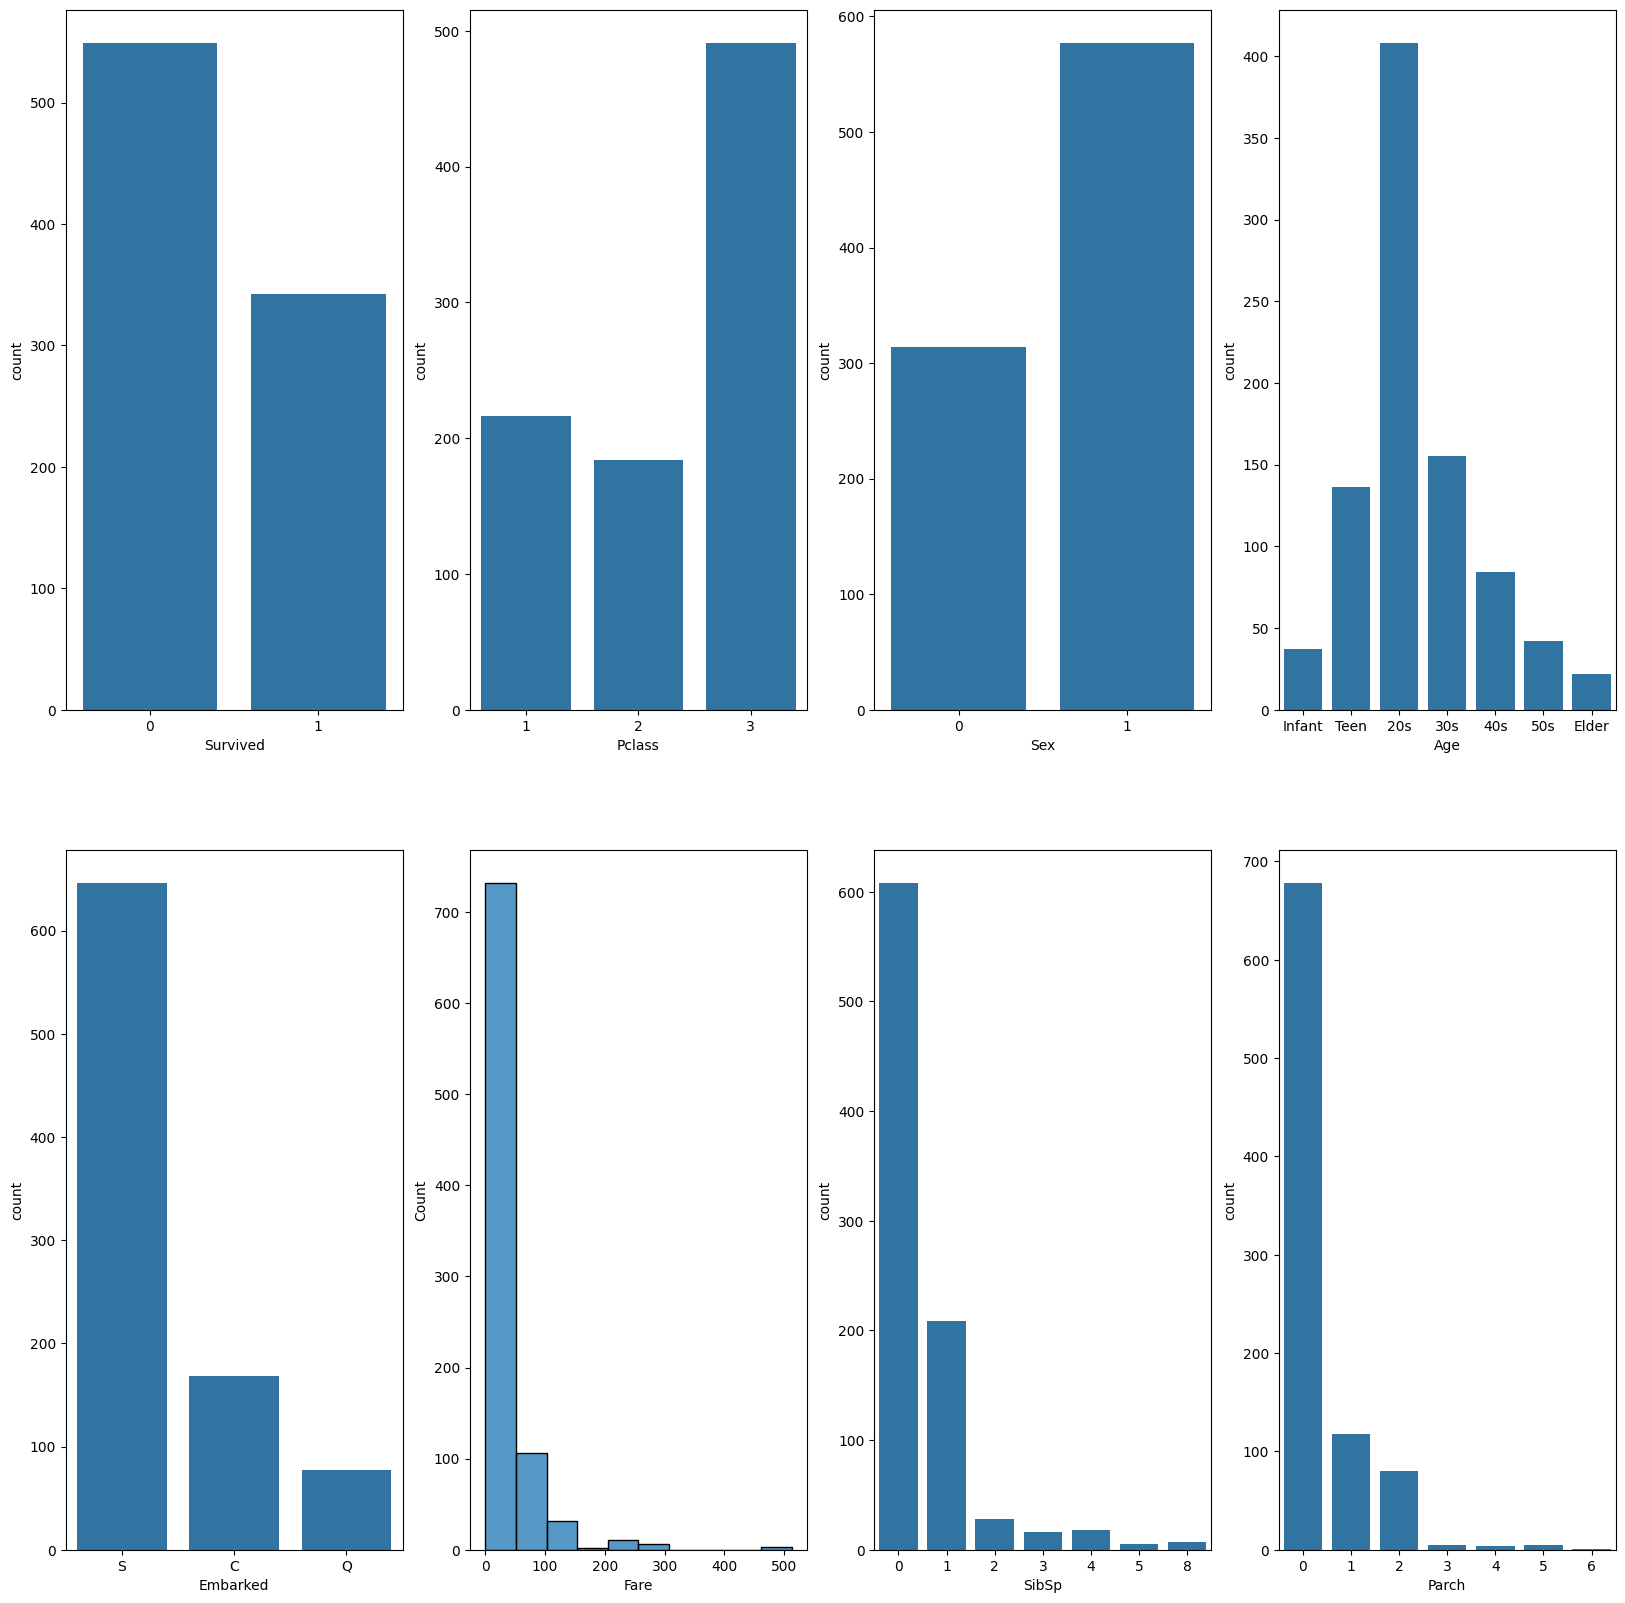

In [ ]:
# visulizing the count of the features
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Survived', data = df, ax= ax[0,0])
sns.countplot(x = 'Pclass', data = df, ax=ax[0,1])
sns.countplot(x = 'Sex', data = df, ax=ax[0,2])
sns.countplot(x = 'Age', data = df, ax=ax[0,3])
sns.countplot(x = 'Embarked', data = df, ax=ax[1,0])
sns.histplot(x = 'Fare', data= df, bins=10, ax=ax[1,1])
sns.countplot(x = 'SibSp', data = df, ax=ax[1,2])
sns.countplot(x = 'Parch', data = df, ax=ax[1,3])


<Axes: xlabel='Pclass', ylabel='Survived'>

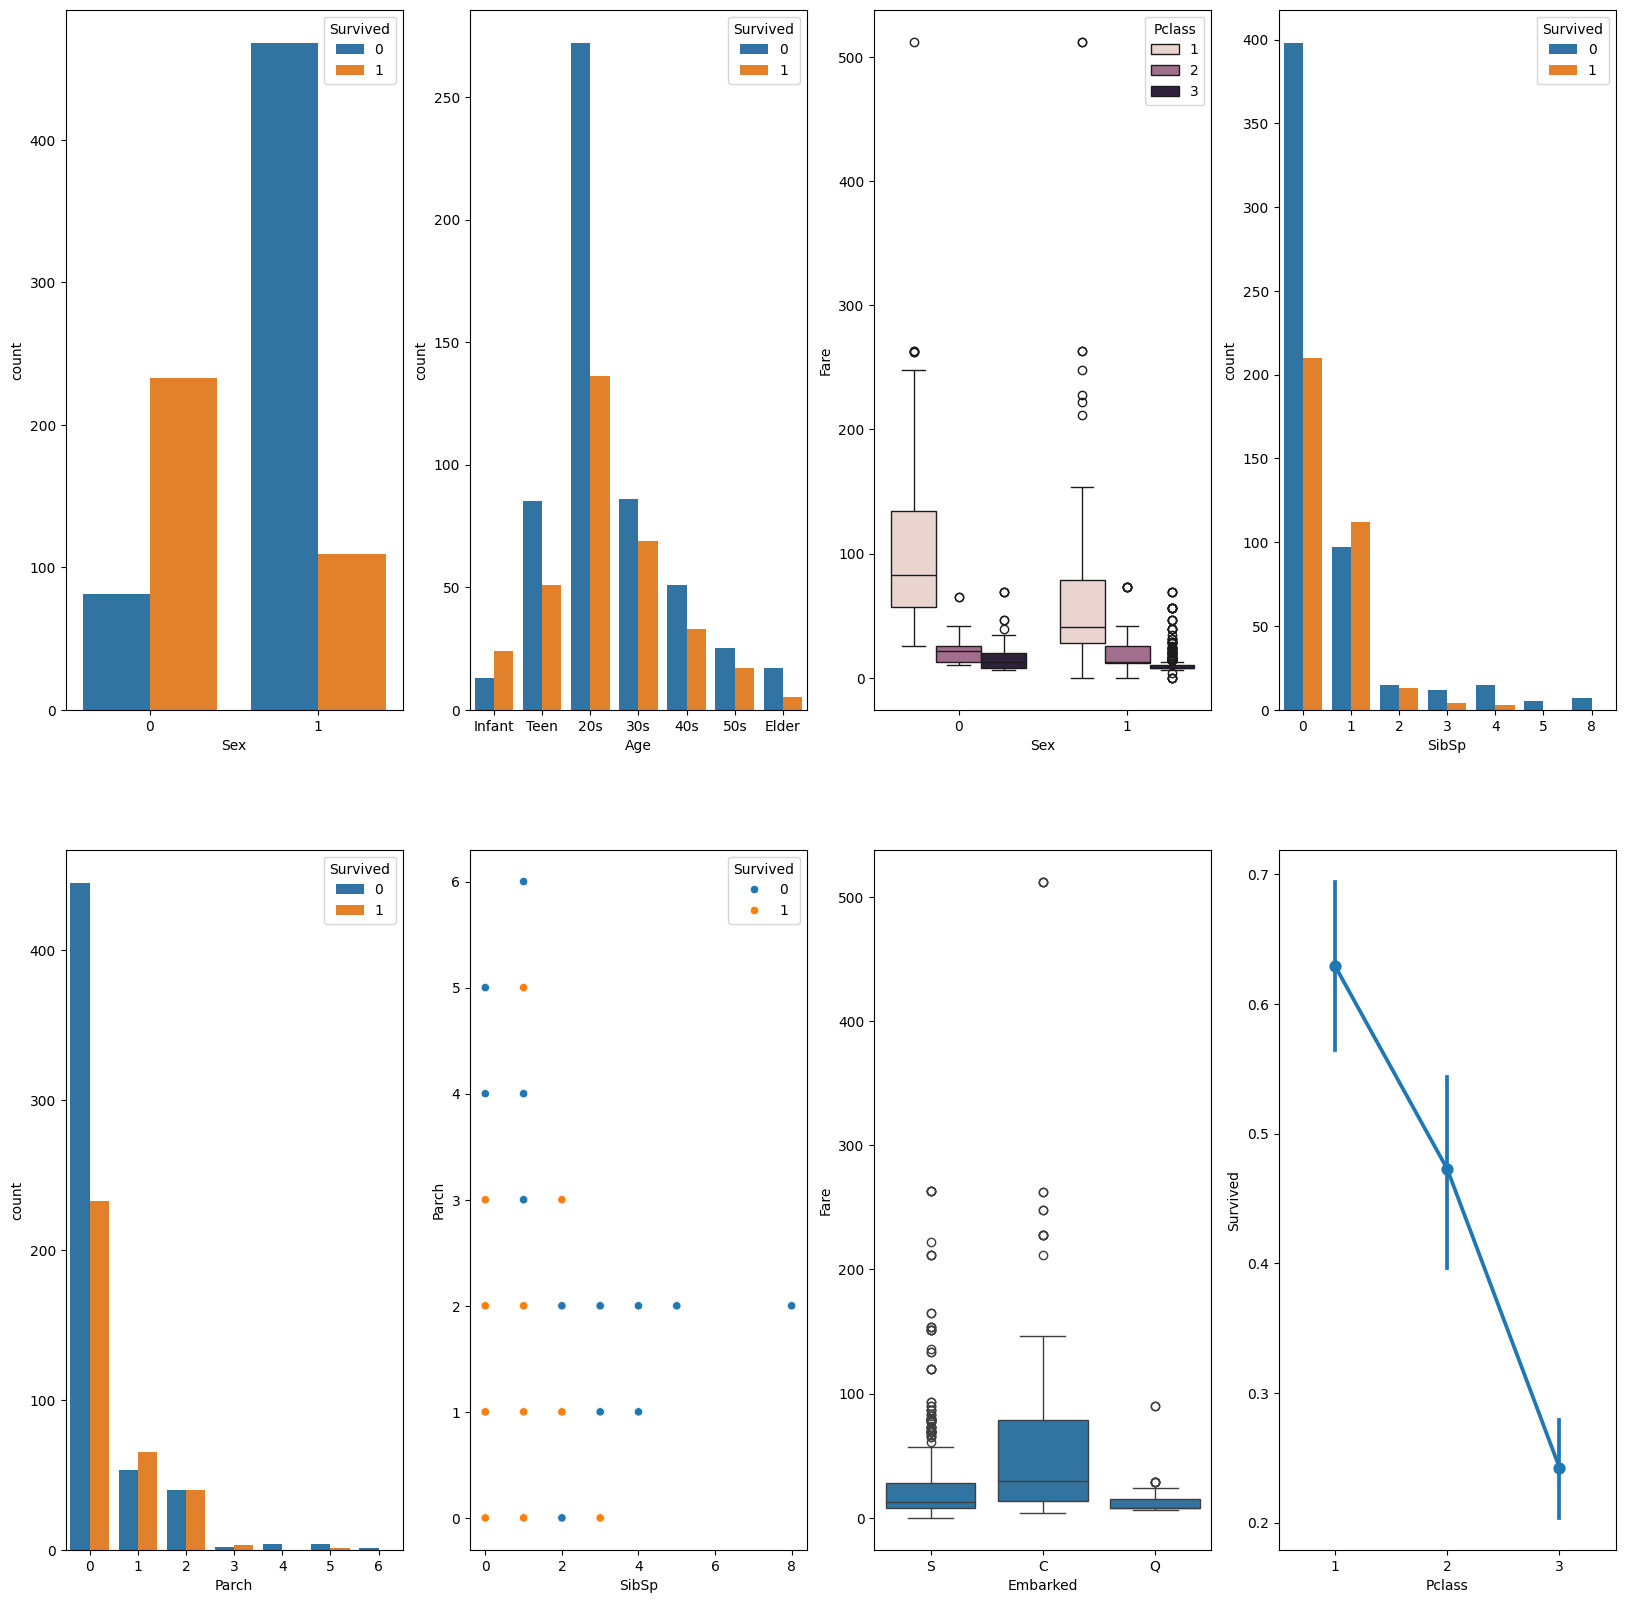

In [ ]:
#visualising relationships between age, sex, fare etc. and survival
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x = 'Sex', data = df, hue = 'Survived', ax= ax[0,0])
sns.countplot(x = 'Age', data = df, hue = 'Survived', ax=ax[0,1])
sns.boxplot(x = 'Sex',y='Fare', data = df, hue = 'Pclass', ax=ax[0,2])
sns.countplot(x = 'SibSp', data = df, hue = 'Survived', ax=ax[0,3])
sns.countplot(x = 'Parch', data = df, hue = 'Survived', ax=ax[1,0])
sns.scatterplot(x = 'SibSp', y = 'Parch', data = df,hue = 'Survived', ax=ax[1,1])
sns.boxplot(x = 'Embarked', y ='Fare', data = df, ax=ax[1,2])
sns.pointplot(x = 'Pclass', y = 'Survived', data = df, ax=ax[1,3])

#Results - female:male survival ratio >> 1
# Larger number of young adults survived as compared to other categories
# People with little to no spouses and siblings had higher survival rates

In [ ]:
#Data preprocessing part 2!
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['S','C','Q'])
df['Embarked'] = le.transform(df['Embarked'])
age_mapping = {
    'infant': 0,
    'teen': 1,
    '20s': 2,
    '30s': 3,
    '40s': 4,
    '50s': 5,
    'elder': 6}
df['Age'] = df['Age'].map(age_mapping)
df.dropna(subset=['Age'], axis= 0, inplace = True)

<Axes: >

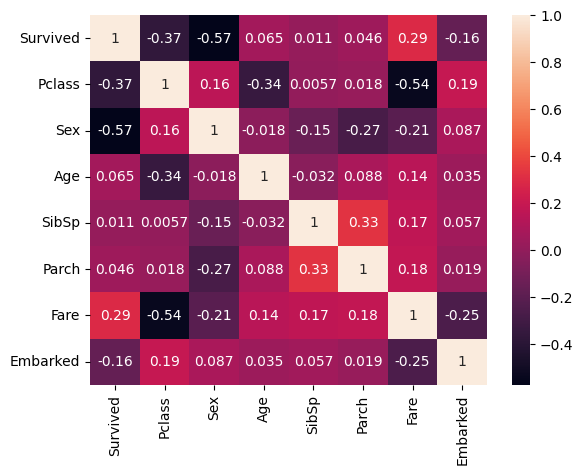

In [ ]:
sns.heatmap(df.corr(), annot= True)
#result - sex, and passenger class were the most relevant parameters when it came to survival and were 'inversely proportional' to survival rates - also people who had more expensive tickets had higher survival chances

In [ ]:
y = df['Survived']
x = df.drop(columns=['Survived'])
#target and independent variables

# Model Training


In [ ]:
#Models chosen - decision tree, stratified k-fold and logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import HistGradientBoostingClassifier

lr = LogisticRegression()
lr.fit(x,y)
lr.score(x,y)
#fit nearly 82% of our training data accurately - not the best

0.818577648766328

In [ ]:
#decision tree
dtree = DecisionTreeClassifier()
dtree.fit(x,y)
dtree.score(x,y)
#94% accuracy - better!

0.9404934687953556

In [ ]:
#quadratic discriminant analysis
quad = QuadraticDiscriminantAnalysis()
quad.fit(x,y)
quad.score(x,y)
#79.6% - worse than logistic.

0.7968069666182874

In [ ]:
#gradiant boosted trees
gbtree = HistGradientBoostingClassifier(learning_rate=0.2, max_iter=500)
gbtree.fit(x,y)
gbtree.score(x,y)
#90-94% - can be tested against decision tree

0.9404934687953556

In [ ]:
from sklearn.metrics import accuracy_score

#Preprocessing testing data
df2 = pd.read_csv('titanic_test.csv')
df2 = df2.drop(columns=['PassengerId','Name','Cabin','Ticket'], axis= 1)
df2['Age'] =  df2['Age'].replace(np.nan,df2['Age'].median(axis=0))
df2['Embarked'] = df2['Embarked'].replace(np.nan, 'S')
#type casting Age to integer
df2['Age'] = df2['Age'].astype(int)
#replacing with 1 and female with 0
df2['Sex'] = df2['Sex'].apply(lambda x : 1 if x == 'male' else 0)
df2['Age'] = pd.cut(x=df2['Age'], bins=[0, 5, 20, 30, 40, 50, 60, 100], labels = [0,1,2,3,4,5,6])
le.fit(['S','C','Q'])
df2['Embarked'] = le.transform(df2['Embarked'])
df2.dropna(subset=['Age'], axis= 0, inplace = True)
df2.head()
x = df2.drop(columns=['Survived'])
y = df2['Survived']



tree_pred = dtree.predict(x)
gbtree_pred = gbtree.predict(x)

print(accuracy_score(y, tree_pred))
print(accuracy_score(y, gbtree_pred))
#Gaussian is better!

0.8959276018099548
0.9004524886877828
